In [29]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

1. Load the Dataset

In [6]:
#load the dataset
df = pd.read_excel('C:/Users/antar/Documents/PROJECTS/coldplay/Coldplay Research Project_Data.xlsx')

#inspect the first rows
df.head()

,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought..."
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How..."
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...


In [7]:
#get info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   106 non-null    int64 
 1   Album Number        106 non-null    int64 
 2   Album Name          106 non-null    object
 3   Album Release Date  106 non-null    int64 
 4   Track Number        106 non-null    int64 
 5   Track Name          106 non-null    object
 6   Lyrics              106 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.9+ KB


In [8]:
#get a list of all albums
df["Album Name"].unique()

array(['Parachutes ', 'A Rush of Blood to the Head', 'X&Y',
       'Viva la Vida or Death and All His Friends', 'Mylo Xyloto',
       'Ghost Stories', 'A Head Full of Dreams', 'Everyday Life',
       'Music of the Spheres'], dtype=object)

2.1 Handle Missing Values

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
missing_values


#                     0
Album Number          0
Album Name            0
Album Release Date    0
Track Number          0
Track Name            0
Lyrics                0
dtype: int64

2. Clean the lyrics

In [11]:
# Function to clean the lyrics text
def clean_lyrics(text):
    text = re.sub(r'\n', ' ', text)  # Replace new lines with spaces
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the Lyrics column
df['Cleaned Lyrics'] = df['Lyrics'].apply(clean_lyrics)

# Display the cleaned DataFrame
df.head()


,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics,Cleaned Lyrics
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought...",bones sinking like stones all that we fought f...
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...,so i look in your direction but you pay me no ...
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How...",i awake to find no peace of mind i said how do...
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...,did i drive you away i know what youll say you...
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...,look at the stars look how they shine for you ...


3. Text Processing

In [15]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Tokenization, stop words removal, and lemmatization.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_lyrics(text):
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return tokens

df['Tokens'] = df['Cleaned Lyrics'].apply(preprocess_lyrics)


# Display the dataframe with tokens
df.head()

,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics,Cleaned Lyrics,Tokens
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought...",bones sinking like stones all that we fought f...,"[bone, sinking, like, stone, fought, home, pla..."
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...,so i look in your direction but you pay me no ...,"[look, direction, pay, attention, know, dont, ..."
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How...",i awake to find no peace of mind i said how do...,"[awake, find, peace, mind, said, live, fugitiv..."
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...,did i drive you away i know what youll say you...,"[drive, away, know, youll, say, say, oh, sing,..."
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...,look at the stars look how they shine for you ...,"[look, star, look, shine, everything, yeah, ye..."


Exploratory Data Analysis

In [24]:
# Calculate basic statistics
num_albums = df['Album Name'].nunique()
num_tracks = df['Track Name'].nunique()
total_lyrics_length = df['Cleaned Lyrics'].str.len().sum()

# Calculate word count and unique word count for each song
df['Word Count'] = df['Tokens'].apply(len)
df['Unique Word Count'] = df['Tokens'].apply(lambda x: len(set(x)))

# Identify the most common words in the entire dataset
all_tokens = [token for tokens in df['Tokens'] for token in tokens]
common_words = Counter(all_tokens).most_common(20)

In [25]:
# Display the results
basic_stats = {
    "Number of Albums": num_albums,
    "Number of Tracks": num_tracks,
    "Total Length of Lyrics": total_lyrics_length,
}

# Show results
basic_stats, df[['Track Name', 'Word Count', 'Unique Word Count']].head(), common_words

({'Number of Albums': 9,
  'Number of Tracks': 106,
  'Total Length of Lyrics': 90385},
     Track Name  Word Count  Unique Word Count
 0  Don't Panic          59                 26
 1       Shiver         133                 46
 2        Spies         118                 44
 3       Sparks          50                 25
 4       Yellow          81                 32,
 [('oh', 192),
  ('know', 172),
  ('im', 161),
  ('dont', 151),
  ('go', 124),
  ('love', 110),
  ('get', 107),
  ('yeah', 106),
  ('come', 101),
  ('na', 96),
  ('got', 93),
  ('youre', 84),
  ('say', 77),
  ('want', 77),
  ('world', 76),
  ('see', 74),
  ('let', 73),
  ('ol', 72),
  ('gon', 64),
  ('light', 64)])

In [26]:
# Function to get most common words for a specific album
def get_common_words_by_album(df, album_name):
    album_tokens = [token for tokens in df[df['Album Name'] == album_name]['Tokens'] for token in tokens]
    return Counter(album_tokens).most_common(20)

# Get a list of unique albums
albums = df['Album Name'].unique()

# Get most common words for each album
common_words_by_album = {album: get_common_words_by_album(df, album) for album in albums}

common_words_by_album

{'Parachutes ': [('yeah', 45),
  ('ill', 19),
  ('live', 18),
  ('know', 18),
  ('never', 18),
  ('oh', 17),
  ('want', 15),
  ('always', 15),
  ('spy', 15),
  ('look', 14),
  ('cause', 13),
  ('dont', 13),
  ('lost', 13),
  ('theyre', 12),
  ('see', 11),
  ('life', 11),
  ('come', 11),
  ('sing', 10),
  ('thing', 10),
  ('ohoh', 10)],
 'A Rush of Blood to the Head': [('whisper', 32),
  ('oh', 25),
  ('go', 24),
  ('daylight', 24),
  ('breaking', 22),
  ('im', 21),
  ('slowly', 21),
  ('yeah', 20),
  ('come', 19),
  ('give', 18),
  ('back', 18),
  ('eye', 14),
  ('mine', 14),
  ('tell', 13),
  ('open', 13),
  ('upon', 13),
  ('good', 13),
  ('na', 13),
  ('said', 13),
  ('place', 12)],
 'X&Y': [('youll', 40),
  ('dont', 28),
  ('go', 25),
  ('see', 25),
  ('thats', 23),
  ('feel', 22),
  ('could', 21),
  ('oh', 21),
  ('im', 20),
  ('na', 19),
  ('say', 19),
  ('know', 18),
  ('get', 17),
  ('youre', 16),
  ('never', 16),
  ('come', 15),
  ('part', 15),
  ('right', 14),
  ('love', 13),

3.1 EDA Visuals

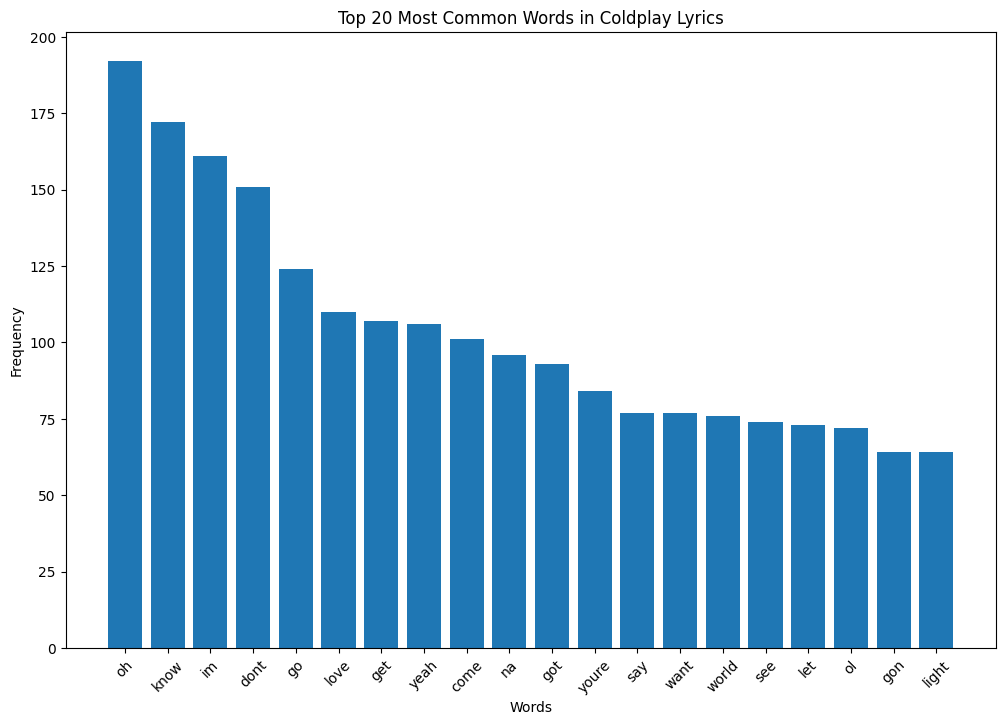

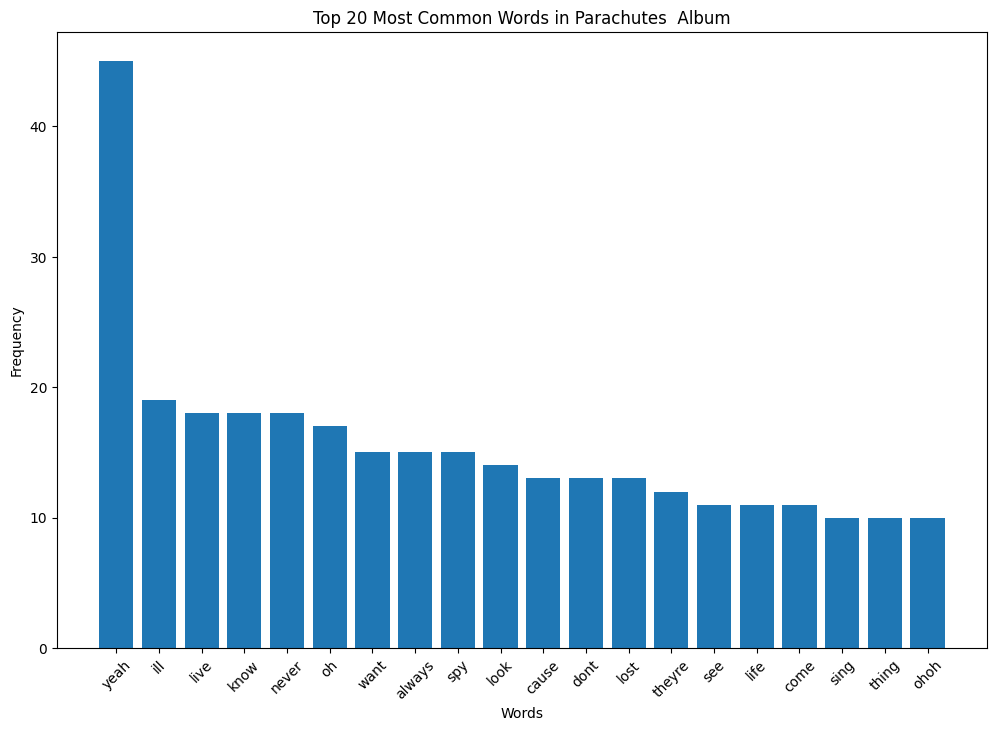

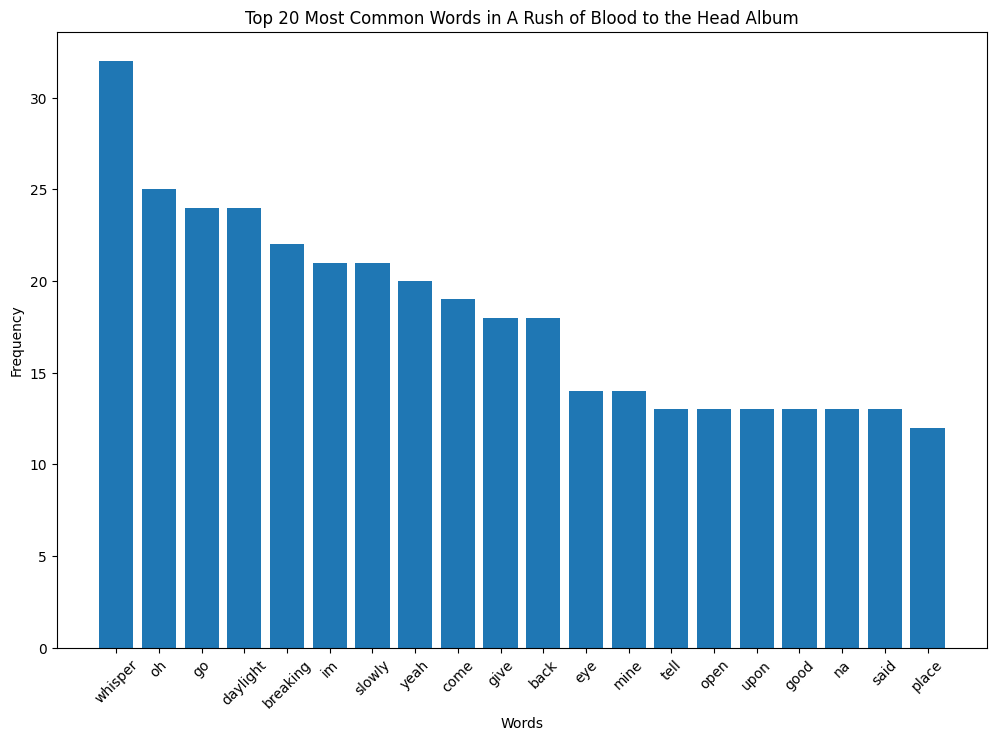

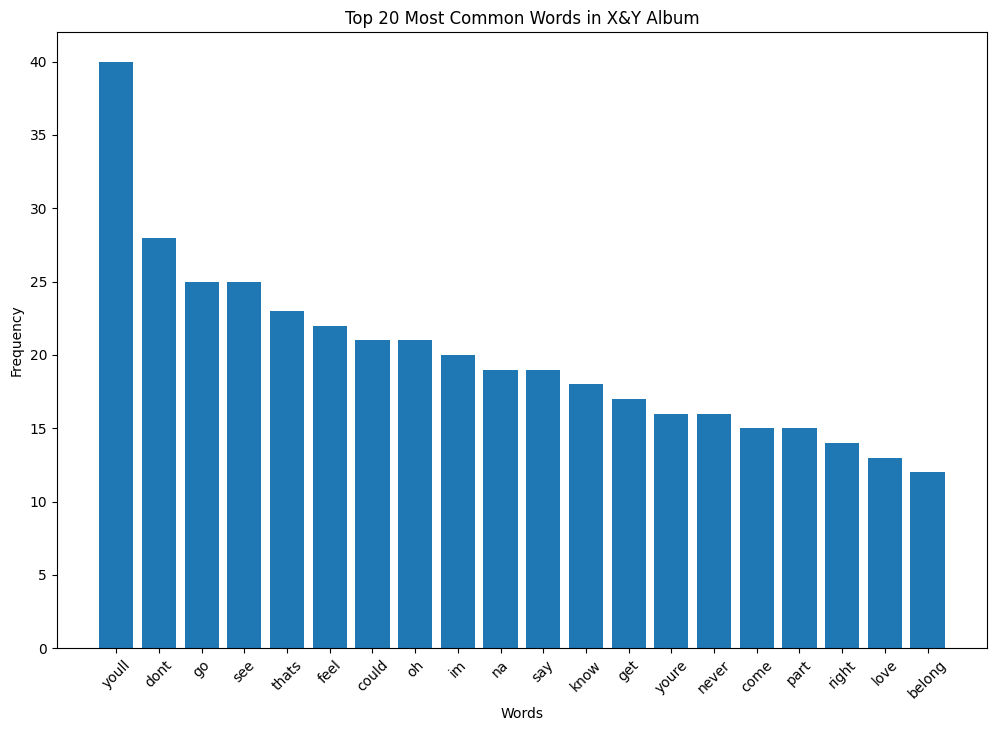

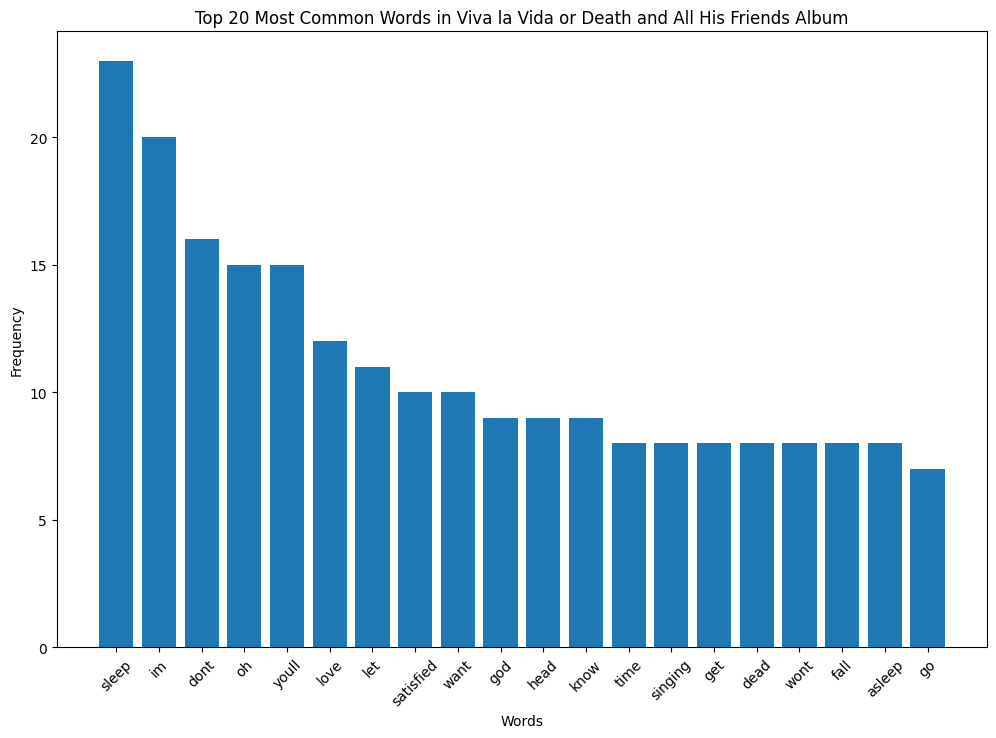

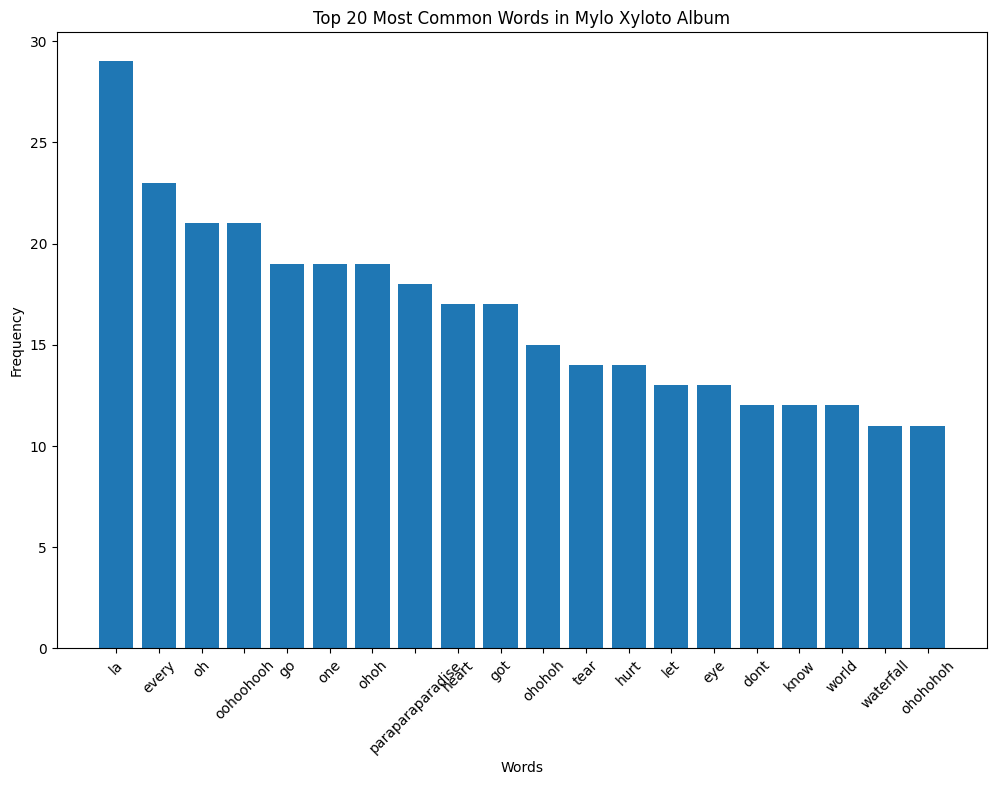

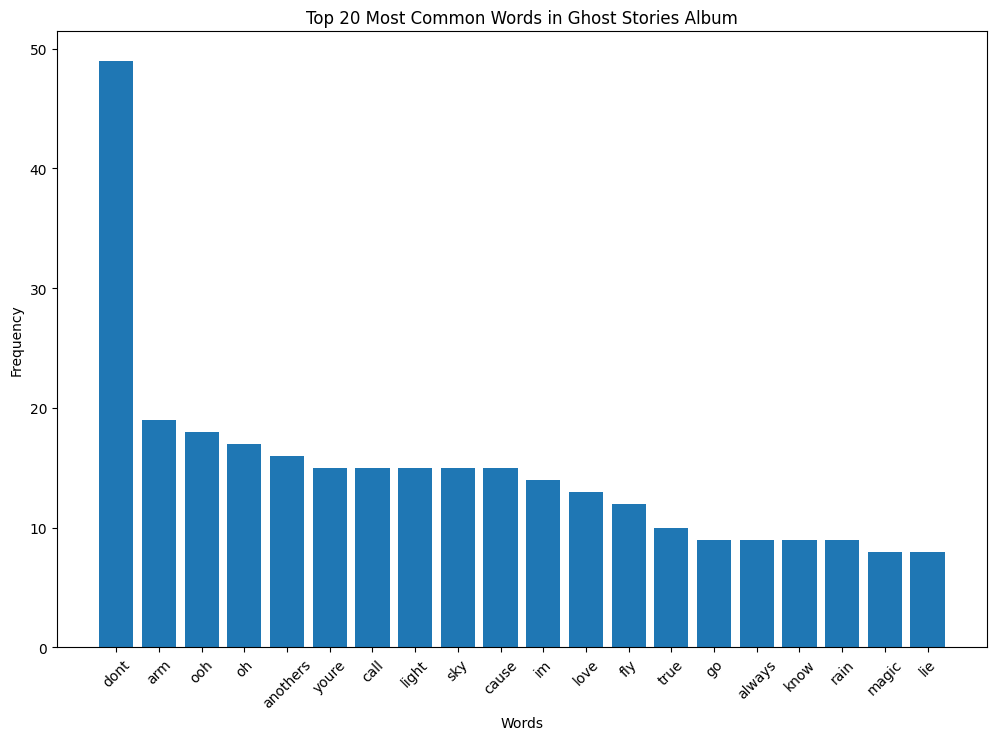

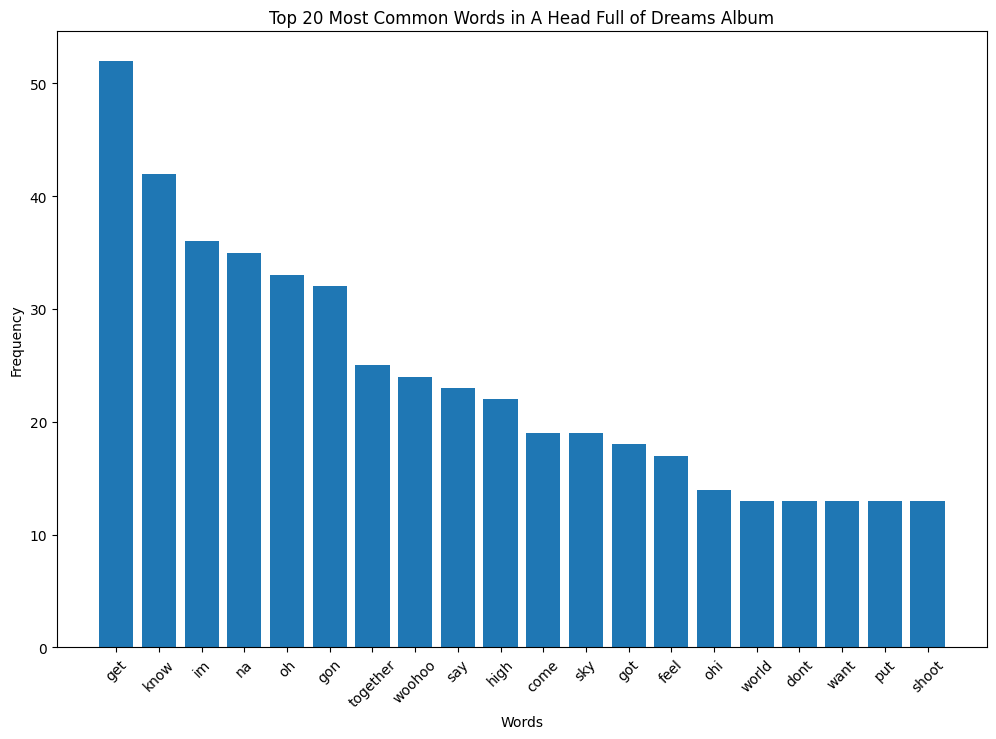

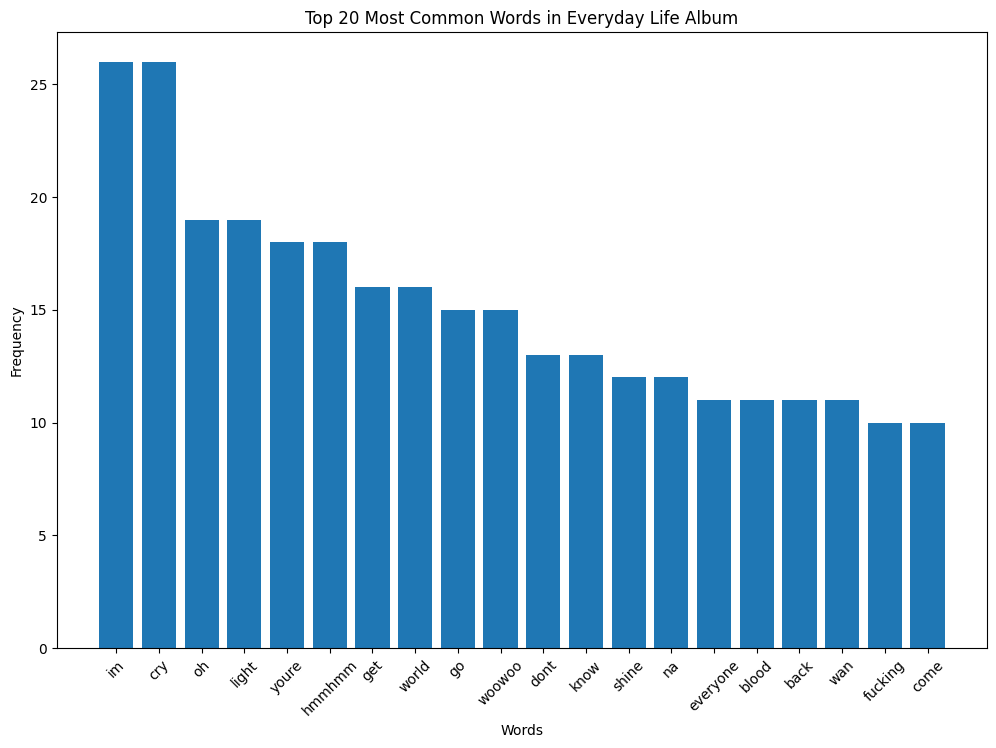

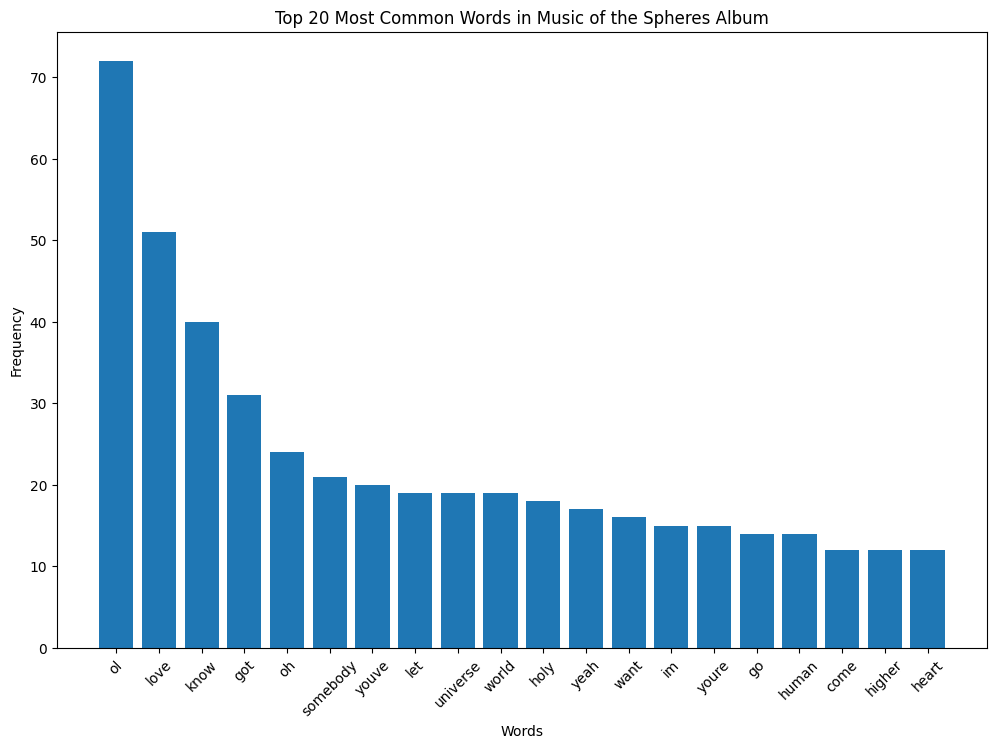

In [27]:
# Function to plot word frequency distribution
def plot_word_frequency(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot overall word frequency distribution
plot_word_frequency(common_words, 'Top 20 Most Common Words in Coldplay Lyrics')

# Plot word frequency distribution for each album
for album, word_counts in common_words_by_album.items():
    plot_word_frequency(word_counts, f'Top 20 Most Common Words in {album} Album')

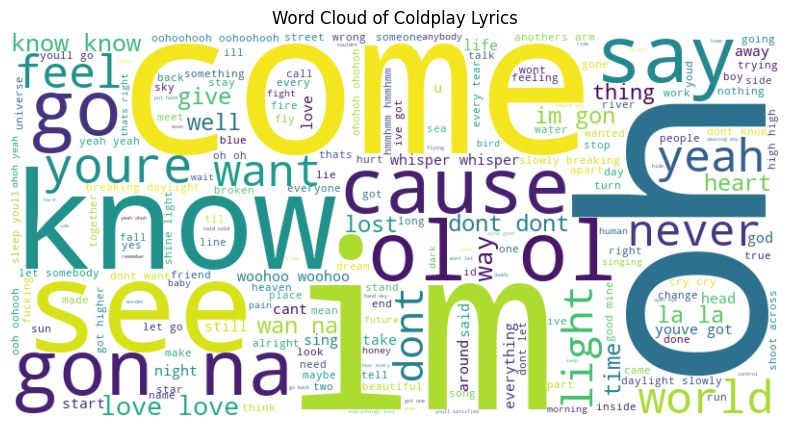

In [30]:
# Combine all tokens into a single string
all_tokens_str = ' '.join([token for tokens in df['Tokens'] for token in tokens])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_str)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Coldplay Lyrics')
plt.show()

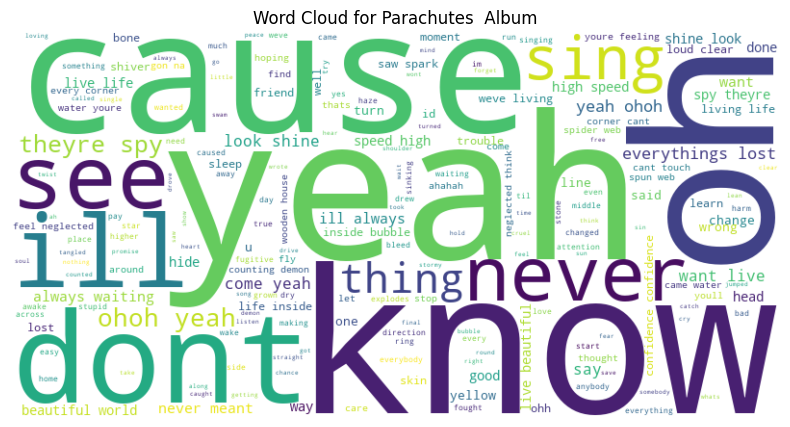

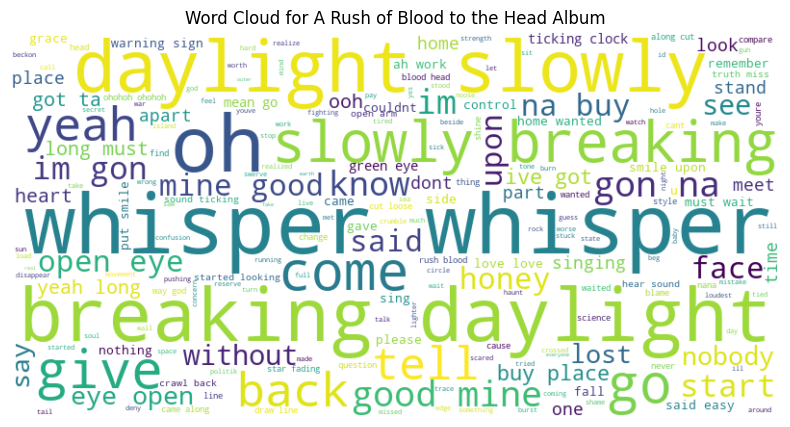

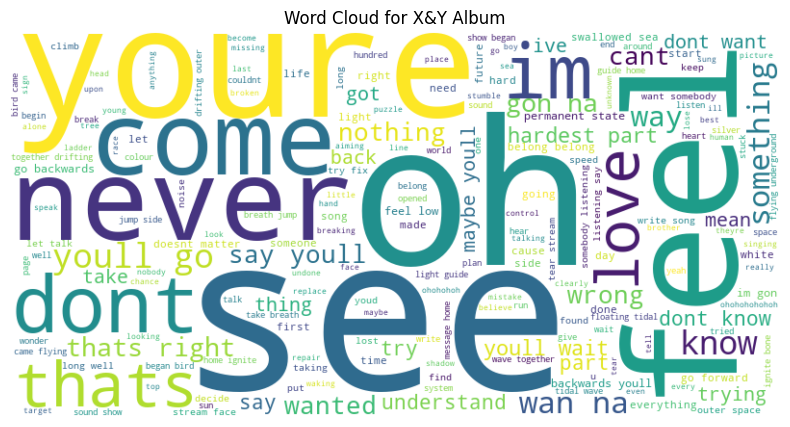

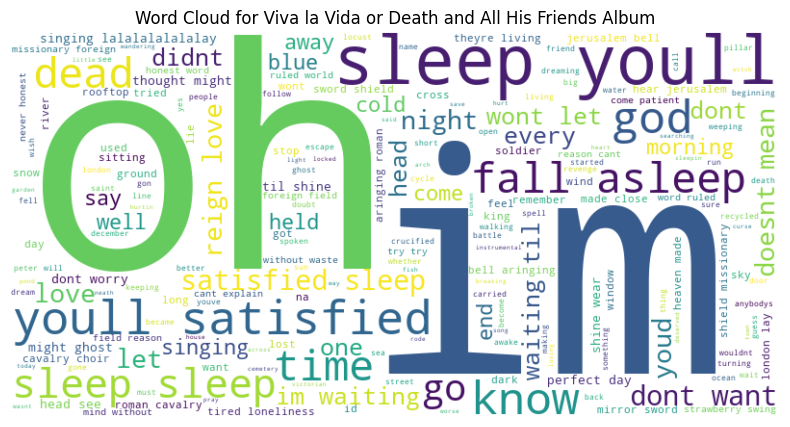

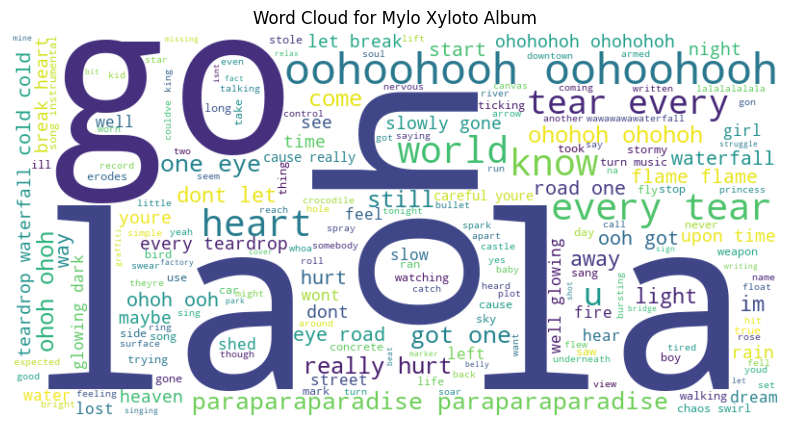

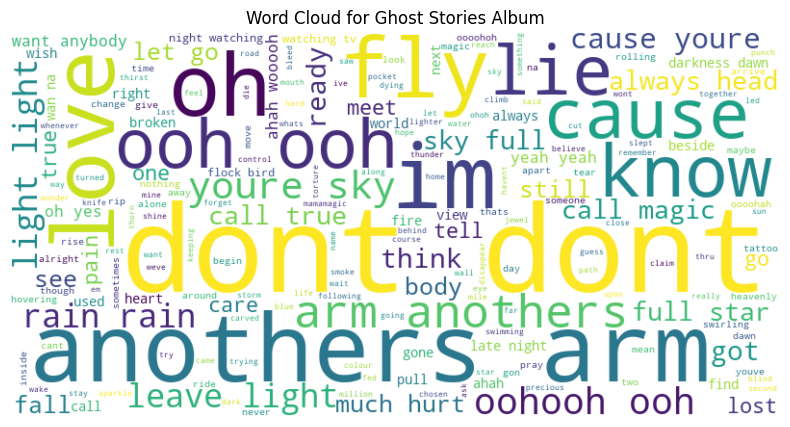

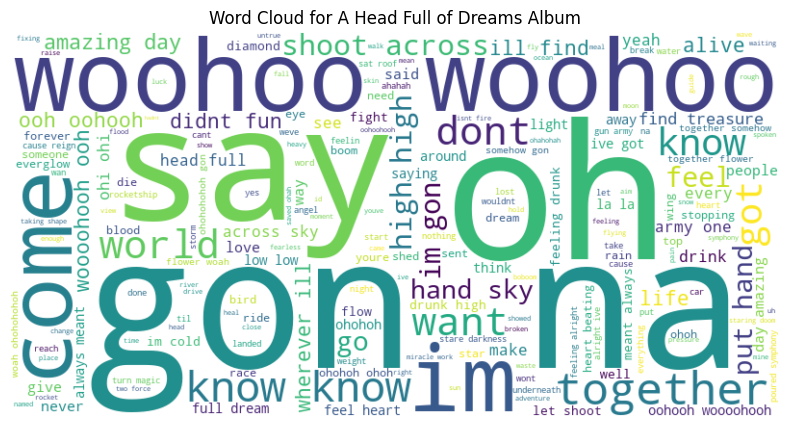

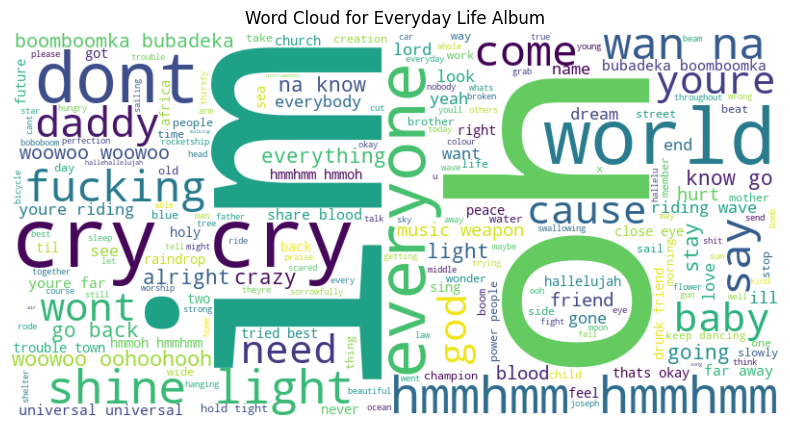

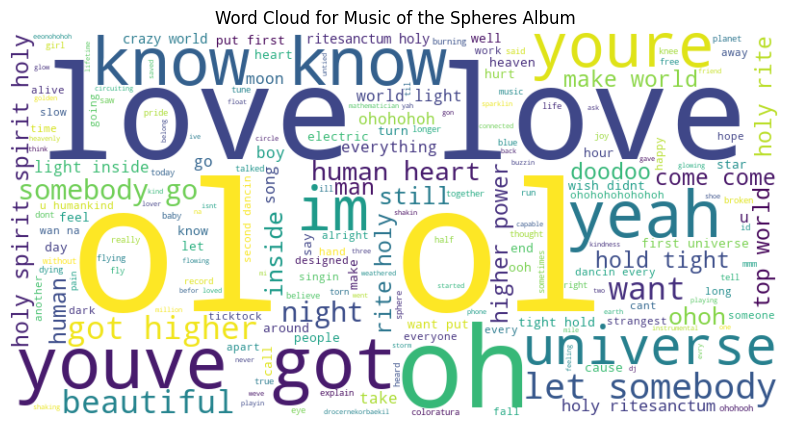

In [31]:
# Function to generate word cloud for each album
def generate_wordcloud(tokens, title):
    tokens_str = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_str)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each album
for album in df['Album Name'].unique():
    album_tokens = [token for tokens in df[df['Album Name'] == album]['Tokens'] for token in tokens]
    generate_wordcloud(album_tokens, f'Word Cloud for {album} Album')
